In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('MNIST_train.csv')

#lets get an idea on how data is arranged in the raw dataset

print(d0.head(8)) #first 4 rows



   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3  

In [8]:
#Lets remove the column 'label' here; because we dont want to perform dimentionality reduction on the labels
#note: we'll add the labels at the end after pre-prosessing

labl=d0['label']

d=d0.drop('label',axis=1) #axis=1; important to notice that its removing the column

print(d.shape)
print(labl.shape)


(42000, 784)
(42000,)


C:\Users\manoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


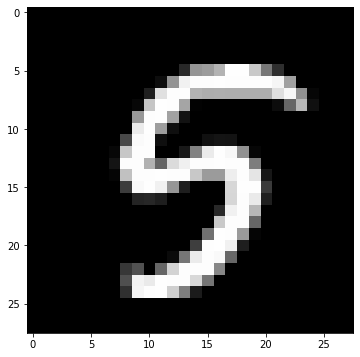

5


In [9]:
# let us try displaying a number
plt.figure(figsize=(6,6))#How big your want your picture should be (just the size on screen)
idx = 8  #idx here is basically a 'row'

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshaping from 1d to 2d pixel array
#get the data from 8th row(idx) make it as a matrix which should be reshaped in 28*28

plt.imshow(grid_data, interpolation = "none", cmap = "gray")#cmap->color map
plt.show()

print(labl[idx])

In [10]:
labels=labl.head(42000)
data=d.head(42000)


In [11]:
print("shape of the sample data:",data.shape)

shape of the sample data: (42000, 784)


In [12]:
from sklearn.preprocessing import StandardScaler
standardized_data= StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [15]:
#Lets find co-variance
#lets find co-variance matrix which A^T * A
sample_data=standardized_data
covariance_matrix=np.matmul(sample_data.T,sample_data)
print("The shape of the variance matrix= ", covariance_matrix.shape)

The shape of the variance matrix=  (784, 784)


In [14]:
#finding top two eigen values and corresponding eigen vectors
#for projecting on to 2Ds
from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value) 
# "eigh" function will return the eigen values in asending order
# this generates only the top 2 (782 and 783) eigenvalues because we need in 2-D
values,vectors = eigh(covariance_matrix, eigvals=(782,783))
print("shape of the eigen vector= ", vectors.shape)
vectors=vectors.T

print("Updated the shape of eigen vectors = ", vectors.shape)

# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector(highest)
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector(highest)

shape of the eigen vector=  (784, 2)
Updated the shape of eigen vectors =  (2, 784)


In [16]:
import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors, sample_data.T)
print (" resultanat new data points shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [17]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


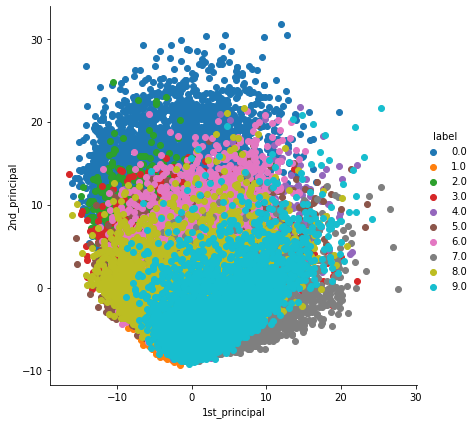

In [31]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# Let's try PCA using sklearn

In [32]:
from sklearn import decomposition  #in the decomposition module we can find the PCA 
pca=decomposition.PCA()


In [34]:
# configuring the parameters
# the number of components = 2
pca.n_components = 2  #Because we trying to visualiza the data in 2D
pca_data = pca.fit_transform(sample_data) #syntax for PCA in sklearn

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)# co-varaince; transpose and multiplication, eg.values and eg.vectors and selecting top 2 of them; all these have performed internally


shape of pca_reduced.shape =  (42000, 2)


C:\Users\manoj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


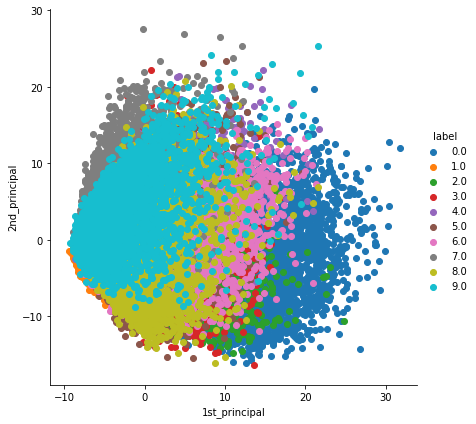

In [35]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data frame which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()